In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw6.ipynb")



## Clustering

## Imports <a name="im"></a>

In [2]:
import os
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN, KMeans
from sklearn.feature_extraction.text import CountVectorizer

%matplotlib inline
pd.set_option("display.max_colwidth", 0)

<br><br><br><br>

In [3]:
import numpy as np
np.random.randint(100, 10_000)

3443

<br><br><br><br>

## Exercise 1: Document clustering warm-up 

The code below extracts introductory sentences of Wikipedia articles on a set of queries. To run the code successfully, you will need the `wikipedia` package installed in the course environment. 

```
conda activate cpsc330
conda install -c conda-forge wikipedia
```



Run the code below which 
- extracts content of Wikipedia articles on a set of queries
- tokenizes the text (i.e., separates sentences) and 
- stores the 2nd sentence in each article as a document representing that article


```
conda activate cpsc330
conda install -c anaconda nltk
```

Even if you have the package installed via the course `conda` environment, you might have to download `nltk` pre-trained models, which can be done with the code below.

In [4]:
import nltk

nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sebas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
import wikipedia
from nltk.tokenize import sent_tokenize, word_tokenize

queries = [
    "hummus food",
    "bread food",
    "artificial intelligence",
    "unsupervised learning",
    "football sport",
    "ice hockey",
]

wiki_dict = {"wiki query": [], "text": [], "n_words": []}
for i in range(len(queries)):
    text = sent_tokenize(wikipedia.page(queries[i]).content)[1]
    wiki_dict["text"].append(text)
    wiki_dict["n_words"].append(len(word_tokenize(text)))
    wiki_dict["wiki query"].append(queries[i])

wiki_df = pd.DataFrame(wiki_dict)
wiki_df

,wiki query,text,n_words
0,hummus food,"The standard garnish in the Middle East includes olive oil, a few whole chickpeas, parsley, and paprika.Popular in Middle Eastern cuisine, it is usually eaten as a dip, with pita bread.",37
1,bread food,"Throughout recorded history and around the world, it has been an important part of many cultures' diet.",20
2,artificial intelligence,"Example tasks in which this is done include speech recognition, computer vision, translation between (natural) languages, as well as other mappings of inputs.AI applications include advanced web search engines (e.g., Google Search), recommendation systems (used by YouTube, Amazon, and Netflix), understanding human speech (such as Siri and Alexa), self-driving cars (e.g., Waymo), generative or creative tools (ChatGPT and AI art), automated decision-making, and competing at the highest level in strategic game systems (such as chess and Go).As machines become increasingly capable, tasks considered to require ""intelligence"" are often removed from the definition of AI, a phenomenon known as the AI effect.",134
3,unsupervised learning,"The goal of supervised learning algorithms is learning a function that maps feature vectors (inputs) to labels (output), based on example input-output pairs.",29
4,football sport,"Sports can, through casual or organized participation, improve participants' physical health.",15
5,ice hockey,It belongs to a family of sports called hockey.,10


Our toy corpus has six toy documents (`text` column in the dataframe) extracted from Wikipedia queries. 

<br><br>

<!-- BEGIN QUESTION -->

### 1.1 How many clusters? 

1. If you are asked to cluster the documents from this toy corpus manually, how many clusters would you identify and how would you label each cluster?   

<div class="alert alert-warning">

Solution_1.1
    


It's quite clear how we would cluster the toy corpus manually when we look at the wiki query. For instance, we can cluster the food related queries-"hummus food" and "bread food". Similarly, we could group the sport related queries-"football sport" and "ice hockey". Thus, clustering on semantics of words. Given that, we'd identify 3 clusters easily. Labeled: Food, Sport, AI.   

### 1.2 `KMeans` with bag-of-words representation 


Before we pass text to machine learning models, we need to encode it to a numeric representation. We will try two representations: bag-of-words representation and sentence embedding representation. First, let's try our good old friend, bag-of-words.



1. Create bag-of-words representation using [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) with `stop_words='english'` for the `text` column in `wiki_df` above. Store the representation in `transformed`.
2. Cluster the documents with this representation and [`KMeans` clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) with the following arguments: 
    - `random_state=42` (for reproducibility)
    - `n_clusters`=the number of clusters you identified in 1.1
3. Store the labels as a list in `kmeans_labels`

<div class="alert alert-warning">

Solution_1.2
    


In [6]:
countvec = None # A variable for `CountVectorizer` object
transformed = None # A variable for the BOW representation of words
countvec = CountVectorizer(stop_words='english')
transformed = countvec.fit_transform(wiki_df['text'])

In [7]:
kmeans_wiki = None # KMeans object
kmeans_labels = None # list
kmeans_wiki = KMeans(n_clusters=3, random_state=42)
kmeans_wiki.fit(transformed)
kmeans_labels = kmeans_wiki.labels_.tolist()

C:\Users\sebas\miniconda3\envs\cpsc330\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [8]:
grader.check("q1.2")

q1.2 results: All test cases passed!

### 1.3 Sentence embedding representation

Bag-of-words representation is limited in that it does not take into account word ordering and context. There are other richer and more expressive representations of text, and we are going to use one such representation in this homework. We will call it **sentence embedding representation**. We'll use [sentence transformer](https://www.sbert.net/index.html) to extract these representations. At this point it's enough to know that this is an alternative representation of text which usually works better than simple bag-of-words representation. We will talk a bit more about embedding representations in the coming weeks. To use sentence transformer, you need to install `sentence-transformers` in the course conda environment to run the code below. 

```conda install -c conda-forge sentence-transformers```




1. Run the code below to create sentence embedding representation of documents in our toy corpus. 
2. Cluster the documents with this representation (`emb_sents`) and `KMeans` with the following arguments: 
    - `random_state=42` (for reproducibility)
    - `n_clusters`=the number of clusters you identified in 1.1
3. Store the labels as a list in `kmeans_emb_labels`

In [9]:
from sentence_transformers import SentenceTransformer

embedder = SentenceTransformer("paraphrase-distilroberta-base-v1")

C:\Users\sebas\miniconda3\envs\cpsc330\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
emb_sents = embedder.encode(wiki_df["text"])
emb_sent_df = pd.DataFrame(emb_sents, index=wiki_df.index)
emb_sent_df

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.071856,0.355502,0.030290,0.177983,0.369931,-0.032932,-0.009006,-0.238870,0.057462,0.222121,...,0.161689,-0.030927,0.368840,0.128081,0.107281,-0.057393,0.515434,0.348882,0.038445,-0.162513
1,-0.022417,0.217159,0.022693,0.003616,0.240856,0.358047,-0.053310,-0.328075,0.190012,0.244470,...,0.265413,-0.415595,0.003036,0.052484,0.345947,0.110091,0.405441,0.197792,-0.058253,0.212376
2,0.138657,0.334279,0.152657,-0.190610,0.329723,-0.086983,0.078042,0.223038,0.063345,0.000502,...,0.049124,0.164720,-0.034465,-0.063466,0.057811,-0.059856,0.352751,-0.268579,-0.081088,0.066146
3,0.282049,0.158558,-0.077177,0.413478,0.351787,0.478120,0.079723,0.468191,0.249393,-0.071113,...,0.231550,-0.038059,0.144132,-0.124127,-0.003824,-0.016014,0.590400,0.028412,0.268744,0.024894
4,0.401522,0.294518,0.169535,0.092036,0.159018,0.504919,0.392199,-0.074318,0.314625,0.033591,...,0.362093,-0.135944,0.133036,0.353604,-0.222302,0.077625,-0.082624,0.261560,0.272954,0.113218
5,0.108902,0.087364,0.119847,-0.050133,0.240210,-0.082101,0.190988,0.436203,-0.085558,-0.012788,...,0.145414,0.160032,0.071931,0.147640,0.043789,0.253031,-0.009358,0.415206,0.142142,0.130365


<div class="alert alert-warning">

Solution_1.3
    


In [11]:
kmeans_emb = None # KMeans object
kmeans_emb_labels = None # list
kmeans_emb = KMeans(n_clusters=3, random_state=42)
kmeans_emb.fit(emb_sent_df)
kmeans_emb_labels = kmeans_emb.labels_.tolist()
kmeans_emb_labels

C:\Users\sebas\miniconda3\envs\cpsc330\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sebas\miniconda3\envs\cpsc330\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[2, 2, 0, 0, 1, 1]

In [12]:
grader.check("q1.3")

q1.3 results: All test cases passed!

<br><br>

<!-- BEGIN QUESTION -->

### 1.4 DBSCAN with cosine distance  


Let's try [`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) on our toy dataset. K-Means is kind of bound to the Euclidean distance because it is based on the notion of means. With `DBSCAN` we can try different distance metrics. In the context of text, [cosine similarities](https://scikit-learn.org/stable/modules/metrics.html#cosine-similarity) or cosine distances tend to work better. Given vectors $u$ and $v$, the **cosine distance** between the vectors is defined as: 

$$distance_{cosine}(u,v) = 1 - (\frac{u \cdot v}{\left\lVert u\right\rVert_2 \left\lVert v\right\rVert_2})$$




1. Cluster documents in our toy corpus encoded with sentence embedding representation (`emb_sents`) and [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html?highlight=dbscan#sklearn.cluster.DBSCAN) with `metric='cosine'`. 

> *Note: You will have to set appropriate values for the hyperparameters `eps` and `min_samples` to get meaningful clusters, as default values for these hyperparameters are unlikely to work on this toy dataset.*

<div class="alert alert-warning">

Solution_1.4
    


In [13]:
#Embedded sentence
dbscan = DBSCAN(metric='cosine', eps=0.7818988, min_samples = 2)
dbscan.fit(emb_sent_df)
dbscan_labels = dbscan.labels_
dbscan_labels

array([ 0,  0,  1,  1,  0, -1], dtype=int64)

In [14]:
#BOW representation 
dbscan = DBSCAN(metric='cosine', eps=0.99, min_samples = 2)
dbscan.fit(transformed)
dbscan.labels_

array([-1, -1,  0,  0,  1,  1], dtype=int64)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.5 Discussion

1. Reflect and comment on the clusters identified by each of the methods you explored in 1.2, 1.3, and 1.4. Are these methods doing a reasonable job in clustering the sentences in our toy corpus? Do the clustering results change with the representation you use?  

<div class="alert alert-warning">

Solution_1.5
    


- KMeans: Ideally we should see two of every cluster label, however for this method (bag of words) we see label 0 being used more prominently than 1 or 2. However, for the embedded representation of the text we get a perfect cluster, at least according to the semantic meaning of the wiki query! Thus, the results of the cluster change with the representation we use.

- DBSCAN: With trial-and-error we found an eps, min_sample combination that almost classified each to pair to their own label (with the embedded representation). However, in its use at least one text was classified as an outlier. For the BOW representation there was a hyperparameter combination that worked perfectly in labeling the pairs of clusters. Similarly, using -1 to identify the outliers. 

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

### 1.6 Visualizing clusters


One thing we can do with unlabeled data is visualizing it. That said, our data is high dimensional and high-dimensional data is hard to visualize. For example, in sentence embedding representation, each example is represented with 768 dimensions. One way to visualize high-dimensional data is by applying dimensionality reduction to get the most important (2 or 3) components of the dataset and visualizing this low-dimensional data. 

Given data as a `numpy` array and corresponding cluster assignments, the `plot_umap_clusters` function below transforms the data by applying dimensionality reduction technique called [UMAP](https://umap-learn.readthedocs.io/en/latest/) to it and plots the transformed data with different colours for different clusters. 

> *Note: At this point we are using this function only for visualization and you are not expected to understand the UMAP part.* 

You'll have to install the `umap-learn` package in the course conda environment either with `conda` or `pip`, as described in the [documentation](https://umap-learn.readthedocs.io/en/latest/index.html). 

```
> conda activate cpsc330
> conda install -c conda-forge umap-learn
```

or 

```
> conda activate cpsc330
> pip install umap-learn
```



1. Visualize the clusters created by the three methods above using `plot_umap_clusters` function below:
    - KMeans with bag-of-words representation 
    - KMeans with sentence embedding representation
    - DBSCAN with sentence embedding representation  

In [15]:
import umap

C:\Users\sebas\miniconda3\envs\cpsc330\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\sebas\miniconda3\envs\cpsc330\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\sebas\miniconda3\envs\cpsc330\lib\site-packages\umap\distances.py:1086: Num

In [16]:
def plot_umap_clusters(
    data,
    cluster_labels,
    raw_sents=wiki_df["text"],
    show_labels=False,
    size=50,
    n_neighbors=15,
    title="UMAP visualization",
    ignore_noise=False,
):
    """
    Carry out dimensionality reduction using UMAP and plot 2-dimensional clusters.

    Parameters
    -----------
    data : numpy array
        data as a numpy array
    cluster_labels : list
        cluster labels for each row in the dataset
    raw_sents : list
        the original raw sentences for labeling datapoints
    show_labels : boolean
        whether you want to show labels for points or not (default: False)
    size : int
        size of points in the scatterplot
    n_neighbors : int
        n_neighbors hyperparameter of UMAP. See the documentation.
    title : str
        title for the visualization plot

    Returns
    -----------
    None. Shows the clusters.
    """

    reducer = umap.UMAP(n_neighbors=n_neighbors, random_state=42)
    Z = reducer.fit_transform(data)  # reduce dimensionality
    umap_df = pd.DataFrame(data=Z, columns=["dim1", "dim2"])
    umap_df["cluster"] = cluster_labels

    if ignore_noise:
        umap_df = umap_df[umap_df["cluster"] != -1]

    labels = np.unique(umap_df["cluster"])

    fig, ax = plt.subplots(figsize=(10, 7))
    ax.set_title(title)

    scatter = ax.scatter(
        umap_df["dim1"],
        umap_df["dim2"],
        c=umap_df["cluster"],
        cmap="tab20b",
        s=size,
        edgecolors="k",
        linewidths=0.1,
    )

    legend = ax.legend(*scatter.legend_elements(), loc="best", title="Clusters")
    ax.add_artist(legend)

    if show_labels:
        x = umap_df["dim1"].tolist()
        y = umap_df["dim2"].tolist()
        for i, txt in enumerate(raw_sents):
            ax.annotate(" ".join(txt.split()[:10]), (x[i], y[i]))
    plt.show()

<div class="alert alert-warning">

Solution_1.4
    


C:\Users\sebas\miniconda3\envs\cpsc330\lib\site-packages\umap\umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


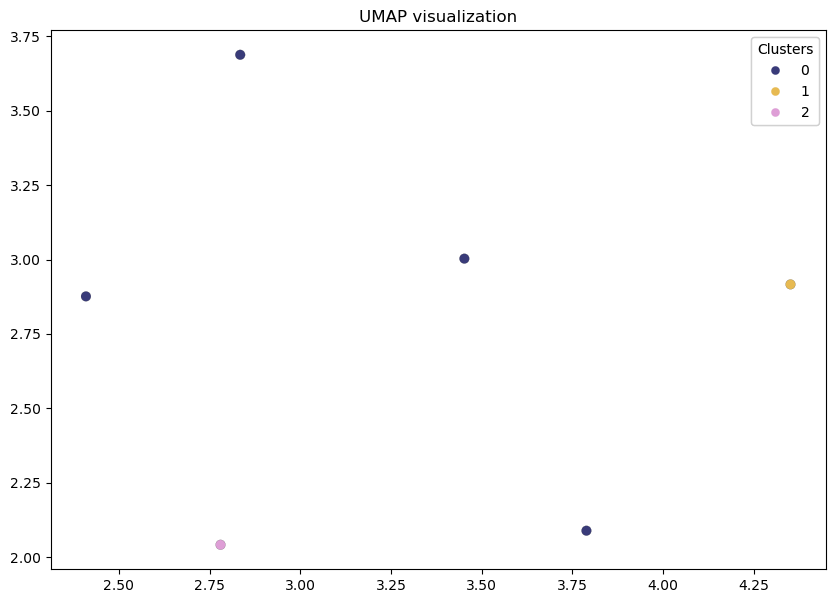

In [17]:
#KMeans BOW
plot_umap_clusters(data=transformed, cluster_labels=kmeans_labels)

C:\Users\sebas\miniconda3\envs\cpsc330\lib\site-packages\umap\umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


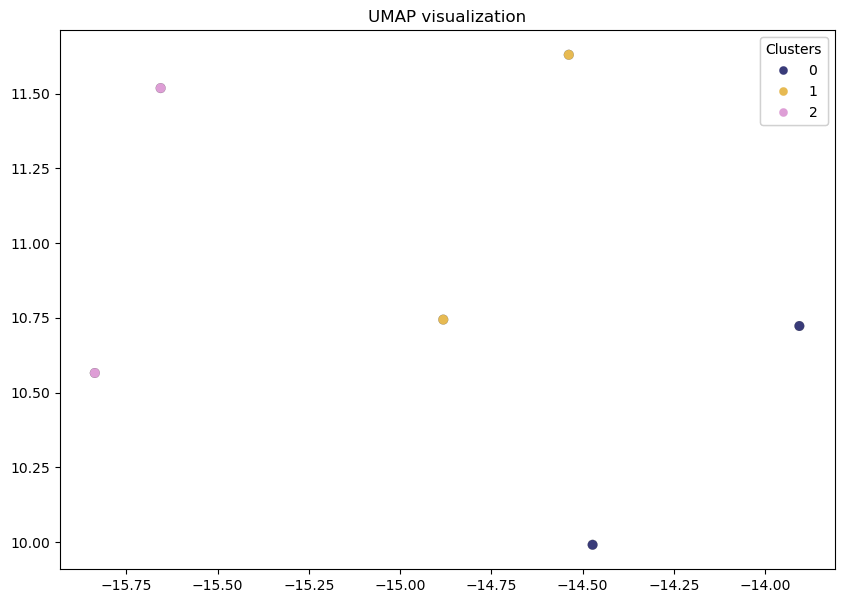

In [18]:
#KMeans embedded sentence 
plot_umap_clusters(data=emb_sent_df, cluster_labels=kmeans_emb_labels)

C:\Users\sebas\miniconda3\envs\cpsc330\lib\site-packages\umap\umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


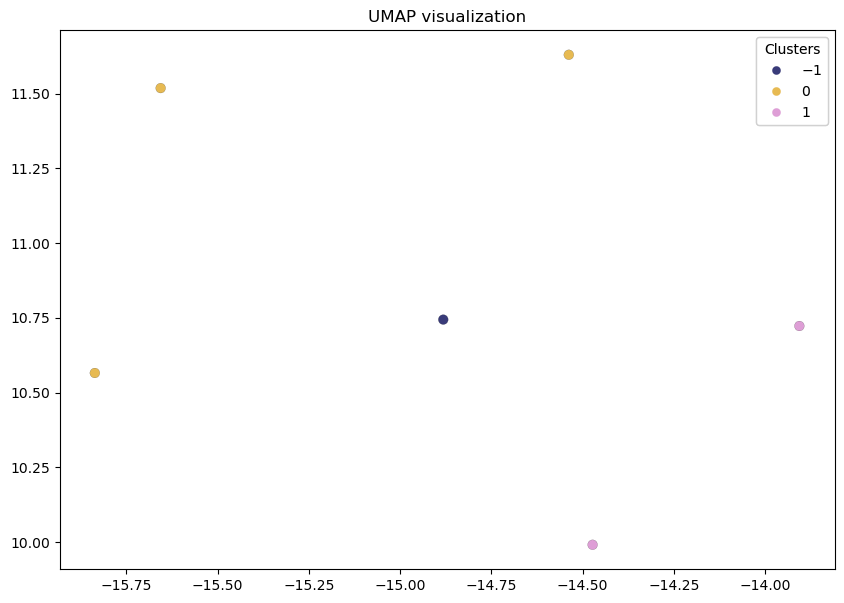

In [19]:
#DBSCAN
plot_umap_clusters(data=emb_sent_df, cluster_labels=dbscan_labels)

<!-- END QUESTION -->

<br><br><br><br>

## Exercise 2: [Food.com](https://www.food.com/) recipes 
<hr>

Now that we have applied document clustering on a toy dataset, let's cluster sentences from a real corpus. In this lab we will work with a sample of [Kaggle's Food.com recipes corpus](https://www.kaggle.com/shuyangli94/food-com-recipes-and-user-interactions). This corpus contains 180K+ recipes and 700K+ recipe reviews. In this homework, we'll only focus on recipes and **not** on recipe reviews. The recipes are present in `RAW_recipes.csv`. Our goal is to find main categories or groupings of recipes based on their names. 


- Download [`RAW_recipes.csv`](https://www.kaggle.com/shuyangli94/food-com-recipes-and-user-interactions?select=RAW_recipes.csv) and put it in the homework folder under the data folder. As usual, do not push the CSV in your repository. 
- Run the code below. The dataset is quite large, and in this assignment, for speed, you will work with a sample of the dataset. The function `get_recipes_sample` below carries out some preliminary preprocessing and returns a sample of the recipes with most frequent tags. 

> *Note: Depending upon the capacity of your computer, feel free to increase or decrease the size of this sample by changing the value for `n_tags`.* 

In [20]:
orig_recipes_df = pd.read_csv("data/RAW_recipes.csv")
orig_recipes_df.shape

(231637, 12)

In [21]:
def get_recipes_sample(orig_recipes_df, n_tags=300, min_len=5):
    orig_recipes_df = orig_recipes_df.dropna()  # Remove rows with NaNs.
    orig_recipes_df = orig_recipes_df.drop_duplicates(
        "name"
    )  # Remove rows with duplicate names.
    # Remove rows where recipe names are too short (< 5 characters).
    orig_recipes_df = orig_recipes_df[orig_recipes_df["name"].apply(len) >= min_len]
    # Only consider the rows where tags are one of the most frequent n tags.
    first_n = orig_recipes_df["tags"].value_counts()[0:n_tags].index.tolist()
    recipes_df = orig_recipes_df[orig_recipes_df["tags"].isin(first_n)]
    return recipes_df

In [22]:
recipes_df = get_recipes_sample(orig_recipes_df)
recipes_df.shape

(9100, 12)

In [23]:
recipes_df["name"]

42        i yam what i yam  muffins    
101       to your health  muffins      
129       250 00 chocolate chip cookies
138       lplermagronen                
163       california roll   salad      
                   ...                 
231430    zucchini wheat germ cookies  
231514    zucchini blueberry bread     
231547    zucchini salsa burgers       
231596    zuppa toscana                
231629    zydeco salad                 
Name: name, Length: 9100, dtype: object

<br><br>

### 2.1 Longest and shorted recipe names 


1. Print the shortest and longest recipe names (length in terms of number of characters) from `recipes_df`. If there is more than one recipe with the same shortest/longest length, store **one** in `shortest_recipe` and/or `longest_recipe` as a **string**.

<div class="alert alert-warning">

Solution_2.1
    

In [24]:
shortest_recipe = None
longest_recipe = None
sorted_df = recipes_df.sort_values(by='name', key=lambda x: x.str.len())
sorted_df = sorted_df.reset_index(drop=True)
shortest_recipe = sorted_df['name'][0]
longest_recipe = sorted_df['name'][sorted_df['name'].shape[0] - 1]

In [25]:
grader.check("q2.1")

q2.1 results: All test cases passed!

<br><br>

<!-- BEGIN QUESTION -->

### 2.2 More EDA


1. Create a word cloud for the recipe names. You can use [the `wordcloud` package](https://github.com/amueller/word_cloud) for this, which you will have to install in the course environment. 

```
> conda activate cpsc330
> conda install -c conda-forge wordcloud
```

<div class="alert alert-warning">

Solution_2.2


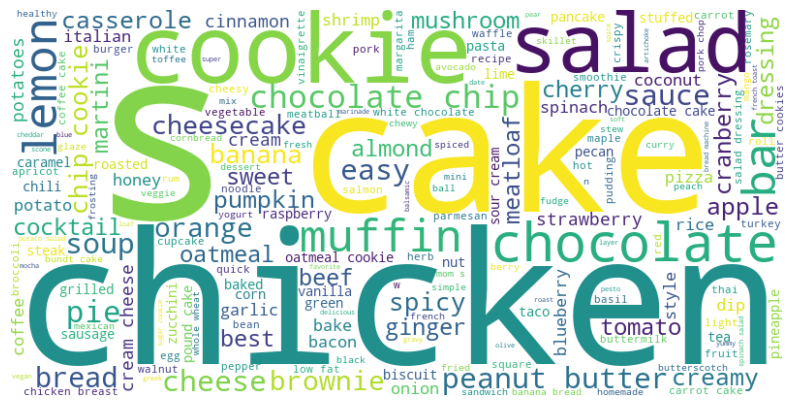

In [26]:
from wordcloud import WordCloud
text = ' '.join(recipes_df['name'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

#Show the wordcloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<!-- END QUESTION -->

<br><br>

### 2.3 Representing recipe names

The next step is creating a representation of recipe names. 



1. Similar to Exercise 1, create sentence embedding representation of recipe names (`name` column in `recipes_df`).  For the rest of the homework, we'll stick to the sentence embedding representation of recipe names.



> *If you create a dataframe with sentence embedding representation, set the index to `recipes_df.index` so that the indices match with the indices of the sample we are working with.*  
> *This might take a while to run.*

<div class="alert alert-warning">

Solution_2.3
    

In [27]:
embeddings = None
emb_sents_recipe = embedder.encode(recipes_df["name"].tolist())
embeddings = pd.DataFrame(emb_sents_recipe, index=recipes_df.index)

In [28]:
grader.check("q2.3")

q2.3 results: All test cases passed!

## Exercise 3: K-Means on Food.com recipe names

<!-- BEGIN QUESTION -->

### 3.1 Choosing K for K-Means

For K-Means you need to specify the number of clusters in advance, which is often challenging to do on real datasets. As we saw in the lecture, there is no definitive method to select the number of clusters. That said, there are some approaches which may help us with this process. In this exercise, you'll explore three such approaches. 


1. Consider a reasonable range of K (`n_clusters`) values and visualize the Elbow plot. 
2. Consider a reasonable range of K (`n_clusters`) and visualize the clusters created by K-Means by using `plot_umap_clusters` function from Exercise 1. 

> You may use the [`yellowbrick`](https://www.scikit-yb.org/en/latest/) package for visualizing the Elbow plot.   

```
pip install yellowbrick
```

> The range of K or `n_clusters` values does not have to be the same in the cases above. 

> Use the default value of `show_labels=False` when you call function `plot_umap_clusters`, as we do not want to display labels of thousands of data points.    

<div class="alert alert-warning">

Solution_3.1
    


C:\Users\sebas\miniconda3\envs\cpsc330\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sebas\miniconda3\envs\cpsc330\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sebas\miniconda3\envs\cpsc330\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sebas\miniconda3\envs\cpsc330\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


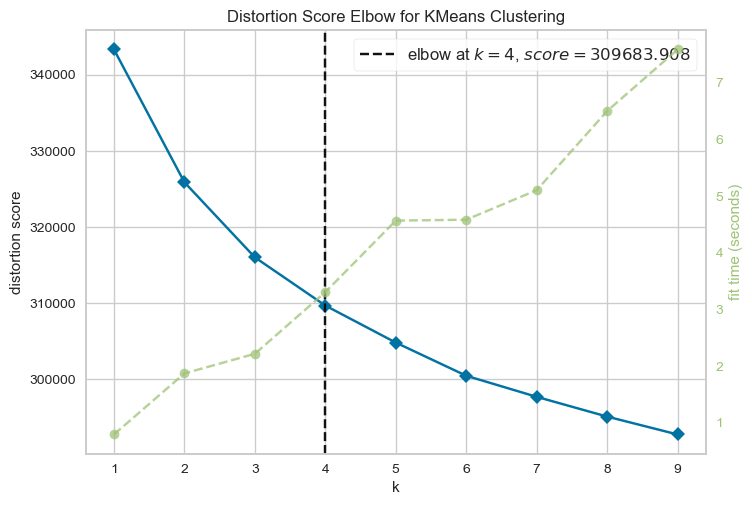

In [38]:
#Let us visulize the elbow method with yellowbrick:
#NOTE: Code is from lecture 14
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 10))

visualizer.fit(embeddings)  # Fit the data to the visualizer
visualizer.show();

C:\Users\sebas\miniconda3\envs\cpsc330\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


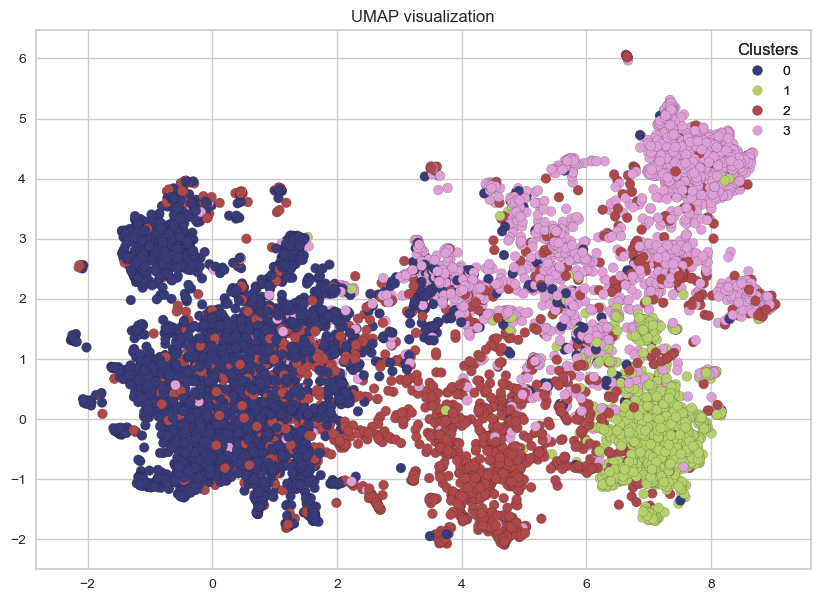

In [39]:
#Plot the clustes 
#KMeans embedded sentence
kmeans_emb_best = KMeans(n_clusters=4, random_state=42)
kmeans_emb_best.fit(embeddings)
kmeans_emb_labels_best = kmeans_emb_best.labels_.tolist()
plot_umap_clusters(data=embeddings, cluster_labels=kmeans_emb_labels_best, show_labels=False)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 3.2 Discussion 

1. Comment on your results from 3.1. Are the plots above useful in narrowing down the range of values for `n_clusters`? Based on these visualizations, what value or a range of values seems reasonable for `n_clusters` in this problem? 

<div class="alert alert-warning">

Solution_3.2
    


The inflection point on this graph shows that k should equal 4. They are useful in narrowing down the fact that increasing the k would increase the overall inertia, and thus the complexity of the clusters. Based on the rules followed, the value that seems the most reasonable is at the inflection point thus k = 4. 

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 3.3 Sampling recipe names from clusters

It's likely that with the methods in the previous exercises you did not get a satisfactory answer on how many clusters should be appropriate for this problem. One of the most important steps in clustering is manual interpretation of clusters. In this exercise, you will examine some samples from different clusters given by K-Means, which might give you a better understanding on the number of clusters and whether the clusters make sense or not.  

1. Based on your answer in Exercise 3.1 and 3.2, pick one or two reasonable values for `n_clusters` and train `KMeans` with those values and `random_state=42`. 
2. Sample some examples (e.g., 10 to 15 recipe names) from each cluster and show the sampled recipes for each cluster. 

<div class="alert alert-warning">

Solution_3.3


In [40]:
#Values one
value_one = 3
value_two = 4
kmeans_one = KMeans(n_clusters=value_one, random_state=42)
kmeans_two = KMeans(n_clusters=value_two, random_state=42)
kmeans_one.fit(embeddings)
kmeans_two.fit(embeddings)

C:\Users\sebas\miniconda3\envs\cpsc330\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sebas\miniconda3\envs\cpsc330\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [90]:
# #Get 10 samples from each cluster:

def get_10_samples(k_model):
    k_model.cluster_centers_
    #Labels of each point
    k_model.labels_

    mydict = {i: np.where(k_model.labels_ == i)[0] for i in range(k_model.n_clusters)}
    for key in mydict:
        cluster_indices = mydict[key][:10]  # Get the indices of points in the current cluster
        recipe_names = recipes_df.iloc[cluster_indices]['name'].values  # Get the names of the recipes
        print(f"Cluster {key}:")
        print(recipe_names)
        print()
    
print("10 examples from each cluster, for kmeans_one")
get_10_samples(kmeans_one)    
print("10 examples from each cluster, for kmeans_two")
get_10_samples(kmeans_two)


10 examples from each cluster, for kmeans_one
Cluster 0:
['lplermagronen' 'marco    polenta' 'starbucks  oat fudge bars'
 'the ultimate brownie' '57 chevy' 'nilla wafer martini' '007 cocktail'
 '17 twist' '2000 flushes' '220 btu']

Cluster 1:
['i yam what i yam  muffins' 'to your health  muffins'
 '250 00 chocolate chip cookies' 'ma s  oatmeal cake and icing'
 'real new york style  cheesecake supreme' 'aunt johnnie s   pound cake'
 'funny bones  cake' 'lofthouse  sugar cookies' 'oh boy  waffles'
 'oops  there it is   chocolate cake low fat']

Cluster 2:
['california roll   salad' 'chef salad  dressing'
 'buffalo wing  mushrooms' 'green  soup'
 'i coulda had a stuffed pepper  stuffed peppers'
 'kelly s chinese cabbage salad' 'mom s chicken' 'orange  soup'
 'ritz  y chicken' 'spicy  pasta fagioli']

10 examples from each cluster, for kmeans_two
Cluster 0:
['california roll   salad' 'chef salad  dressing'
 'buffalo wing  mushrooms' 'green  soup'
 'i coulda had a stuffed pepper  stuffed pe

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 3.4 Manual interpretation of clusters

1. Do you see a clear distinction between clusters? What topics/themes do to see in different clusters? 

<div class="alert alert-warning">

Solution_3.4
    


1. For kmeans_one, with k = 3. There seems to be a semantic difference, in many cases, cluster 1 has "breakfast" like recipes. While cluster 0 has cocktails and mixed drinks and foods (that are blended). Similarly, cluster 2 contains more "dinner" like food. 

2. For kmeans_two with k = 4. Cluster 0 is savory like foods, cluster 1 is "breakfast" like food, cluster 2 is mixed drink foods, cluster 3 is dessert/cafe food. 

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 3.5 Dendrogram

1. Show a dendrogram with `p=10` and `truncate_mode=level` on sentence embeddings of recipes with average linkage and `metric="cosine"`.
2. Briefly comment on the results.

> *Note: Try orientation="left" of `dendrogram` for better readability of the dendrogram.*

<div class="alert alert-warning">

Solution_3.5
    

C:\Users\sebas\AppData\Local\Temp\ipykernel_10748\3385428395.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=80, fontsize=12)


[Text(0.0, 0, '0.0'),
 Text(0.2, 0, '0.2'),
 Text(0.4, 0, '0.4'),
 Text(0.6000000000000001, 0, '0.6'),
 Text(0.8, 0, '0.8'),
 Text(1.0, 0, '1.0')]

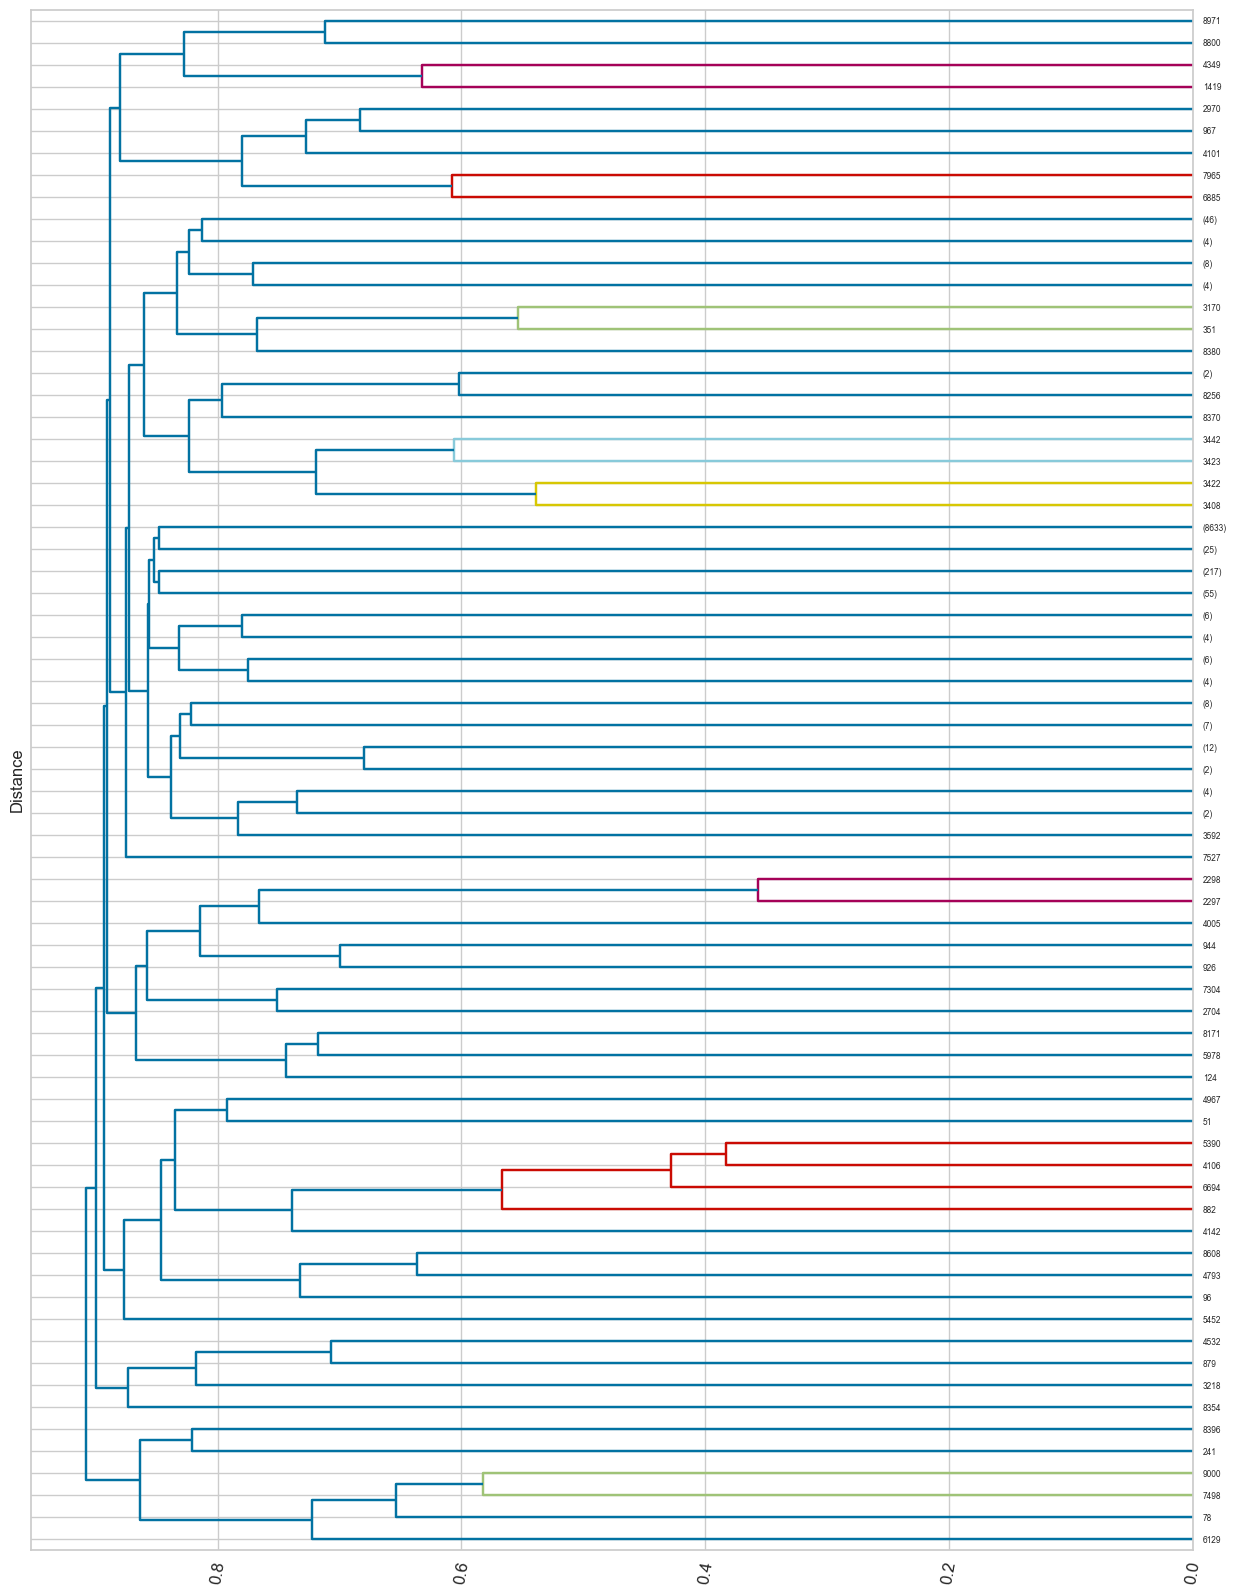

In [94]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(embeddings, method="average", metric="cosine")
fig, ax = plt.subplots(figsize=(15, 20))
dendrogram(Z, p=10, truncate_mode='level', orientation='left', ax=ax)
ax = plt.gca()
ax.set_ylabel("Distance", fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80, fontsize=12)